In [3]:
import sys
import os
import random
import math
import multiprocessing as mp
import gc
import time
import datetime
from typing import Tuple, List
from shutil import copy

from tqdm import tqdm
import tensorflow as tf



import PIL
from PIL import Image as PImage
import cv2

from PIL import ImageFilter, ImageFont, ImageDraw, ImageChops
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image

#define a font to show japanese characters in matplotlib figures
import matplotlib.font_manager as fm
show_sample_font = fm.FontProperties(fname=os.path.join("..", "fonts", "NotoSerifCJKjp-Regular.otf"), size=20)

In [4]:
labels = None
with open('labels.txt', 'r') as t:
    labels = t.read()
    
print(labels)

あいぐセ役彼往征径待律後徐徒ゼ従得御復循微徳徴徹徽ソ心必忌忍志忘忙応忠快ゾ念忽怒怖怜思怠急性怨タ怪怯恋恐恒恕恢恥恨恩ダ恭息恰恵悉悌悔悟悠患チ悦悩悪悲悶悼情惇惑惚ヂ惜惟惣惨惰想惹愁愈愉ツ意愚愛感慈態慌慎慕慢ヅ慣慧慨慮慰慶慾憂憎憐けテ憤憧憩憲憶憾懇懐懲懸デ戊戎成我戒或戚戟戦戯ト戴戸戻房所扇扉手才打ド払托扮扱扶批承技抄把ナ抑投抗折抜択披抱抵抹ニ押抽担拍拐拒拓拘拙招ヌ拝拠拡括拭拳拶拷拾持ネ指按挑挙挟挨挫振挺挽ノ挿捉捌捕捗捜捧捨据捲ハ捷捺捻掃授掌排掘掛掠げバ採探接控推掩措掬掲掴パ掻揃描提揖揚換握揮援ヒ揺損搬搭携搾摂摘摩摸ビ摺撃撒撚撞撤撫播撮撰ピ撲撹擁操擢擦擬擾支改フ攻放政故敏救敗教敢散ブ敦敬数整敵敷文斉斌斎プ斐斑斗料斜斡斤斥斧斬ヘ断斯新方於施旅旋族旗ベ既日旦旧旨早旬旭旺昂こペ昆昇昌明昏易昔星映春ホ昧昨昭是昼時晃晋晒晦ボ晩普景晴晶智暁暇暑暖ポ暗暢暦暫暮暴曇曙曜曝マ曲曳更書曹曽曾替最月ミ有朋服朔朕朗望朝期木ム未末本札朱朴机朽杉李メ杏材村杓杖杜束条杢来モ杭杯東杵杷松板枇析枕ヤ林枚果枝枠枢枯架柁柄ごユ柊柏某柑染柔柘柚柱柳ヨ柴柵査柾柿栂栃栄栓栖ラ栗校栢株栴核根格栽桁リ桂桃案桐桑桓桔桜桝桟ル桧桶梁梅梓梗梢梧梨梯レ械梱梶梼棄棉棋棒棚棟ロ森棲棺椀椅椋植椎椙椛ワ検椴椿楊楓楕楚楠楢業ヰ楯楳極楼楽概榊榎榔榛ヱ構槌槍様槙槻槽樋樗標さヲ樟模権横樫樵樹樺樽橋ン橘機橡橿檀檎櫓櫛櫨欄一欝欠次欣欧欲欺欽款歌丁歎歓止正此武歩歪歯歳七歴死殆殉殊残殖殴段殺万殻殿毅母毎毒比毘毛氏丈民気水氷永氾汀汁求汎三汐汗汚汝江池汰汲決汽上沃沈沌沓沖沙没沢沫河下沸油治沼沿況泉泊泌法ざ不泡波泣泥注泰泳洋洗洛与洞津洩洪洲活派流浄浅丑浜浦浩浪浬浮浴海浸消且涌涙涛涜涯液涼淀淋淑世淘淡淫深淳淵混添清渇丘済渉渋渓渚減渠渡渥渦丙温測港湊湖湘湛湧湯湾丞湿満溌源準溜溝溢溶溺両滅滋滑滝滞滴漁漂漆漉並漏演漕漠漢漣漫漬漸潅し中潔潜潟潤潮潰澄澗澱激串濁濃濠濡濫濯瀕瀞瀦瀧丸瀬灘火灯灰灸灼災炉炊丹炎炭点為烈烏烹焔焚無主焦然焼煉煎煙煤照煩煮乃煽熊熔熟熱燃燈燐燕燥久燦燭爆爪爵父爺爽爾片之版牌牒牙牛牝牟牡牢牧乍物牲特牽犀犠犬犯状狂乎狐狗狙狛狩独狭狸狼狽じ乏猛猟猪猫献猶猷猿獄獅乗獣獲玄率玉王玖玩玲珂乙珊珍珠珪班現球理琉琢九琳琴琵琶瑚瑛瑞瑠瑳璃乞環璽瓜瓢瓦瓶甑甘甚甜也生産甥用甫田由甲申男乱町画界畏畑畔留畜畝畠乳畢略畦番異畳畷畿疋疎乾疏疑疫疲疹疾病症痔痕亀痘痛痢痩痴療癌癒癖

In [5]:
modified_filepath = f'./unicode-pictures-dataset/modified-dataset/'
existing_labels = os.listdir(modified_filepath)
existing_labels.sort()
print(existing_labels)

['0x3042', '0x3043', '0x3044', '0x3046', '0x3047', '0x3048', '0x304a', '0x304b', '0x304c', '0x304d', '0x304e', '0x304f', '0x3050', '0x3051', '0x3052', '0x3053', '0x3054', '0x3055', '0x3056', '0x3057', '0x3058', '0x3059', '0x305a', '0x305b', '0x305c', '0x305d', '0x305e', '0x305f', '0x3060', '0x3061', '0x3062', '0x3063', '0x3064', '0x3065', '0x3066', '0x3067', '0x3068', '0x3069', '0x306a', '0x306b', '0x306c', '0x306d', '0x306e', '0x306f', '0x3070', '0x3071', '0x3072', '0x3073', '0x3074', '0x3075', '0x3076', '0x3077', '0x3078', '0x3079', '0x307a', '0x307b', '0x307c', '0x307d', '0x307e', '0x307f', '0x3080', '0x3081', '0x3082', '0x3083', '0x3084', '0x3085', '0x3086', '0x3087', '0x3088', '0x3089', '0x308a', '0x308b', '0x308c', '0x308d', '0x308f', '0x3090', '0x3091', '0x3092', '0x3093', '0x3099', '0x309a', '0x30a2', '0x30a3', '0x30a4', '0x30a6', '0x30a7', '0x30a8', '0x30aa', '0x30ab', '0x30ac', '0x30ad', '0x30ae', '0x30af', '0x30b0', '0x30b1', '0x30b2', '0x30b3', '0x30b4', '0x30b5', '0x30b6',

In [6]:
encoded_labels = [hex(ord(x)) for x in labels]
encoded_labels.sort()
print(encoded_labels)

['0x3042', '0x3044', '0x3046', '0x3048', '0x304a', '0x304b', '0x304c', '0x304d', '0x304e', '0x304f', '0x3050', '0x3051', '0x3052', '0x3053', '0x3054', '0x3055', '0x3056', '0x3057', '0x3058', '0x3059', '0x305a', '0x305b', '0x305c', '0x305d', '0x305e', '0x305f', '0x3060', '0x3061', '0x3062', '0x3063', '0x3064', '0x3065', '0x3066', '0x3067', '0x3068', '0x3069', '0x306a', '0x306b', '0x306c', '0x306d', '0x306e', '0x306f', '0x3070', '0x3071', '0x3072', '0x3073', '0x3074', '0x3075', '0x3076', '0x3077', '0x3078', '0x3079', '0x307a', '0x307b', '0x307c', '0x307d', '0x307e', '0x307f', '0x3080', '0x3081', '0x3082', '0x3083', '0x3084', '0x3085', '0x3086', '0x3087', '0x3088', '0x3089', '0x308a', '0x308b', '0x308c', '0x308d', '0x308f', '0x3090', '0x3091', '0x3092', '0x3093', '0x30a2', '0x30a3', '0x30a4', '0x30a6', '0x30a7', '0x30a8', '0x30aa', '0x30ab', '0x30ac', '0x30ad', '0x30ae', '0x30af', '0x30b0', '0x30b1', '0x30b2', '0x30b3', '0x30b4', '0x30b5', '0x30b6', '0x30b7', '0x30b8', '0x30b9', '0x30ba',

In [7]:
all_labels = list(set(encoded_labels + existing_labels))
all_labels.sort()
print(len(all_labels))
print(all_labels)

6512
['0x3042', '0x3043', '0x3044', '0x3046', '0x3047', '0x3048', '0x304a', '0x304b', '0x304c', '0x304d', '0x304e', '0x304f', '0x3050', '0x3051', '0x3052', '0x3053', '0x3054', '0x3055', '0x3056', '0x3057', '0x3058', '0x3059', '0x305a', '0x305b', '0x305c', '0x305d', '0x305e', '0x305f', '0x3060', '0x3061', '0x3062', '0x3063', '0x3064', '0x3065', '0x3066', '0x3067', '0x3068', '0x3069', '0x306a', '0x306b', '0x306c', '0x306d', '0x306e', '0x306f', '0x3070', '0x3071', '0x3072', '0x3073', '0x3074', '0x3075', '0x3076', '0x3077', '0x3078', '0x3079', '0x307a', '0x307b', '0x307c', '0x307d', '0x307e', '0x307f', '0x3080', '0x3081', '0x3082', '0x3083', '0x3084', '0x3085', '0x3086', '0x3087', '0x3088', '0x3089', '0x308a', '0x308b', '0x308c', '0x308d', '0x308f', '0x3090', '0x3091', '0x3092', '0x3093', '0x3099', '0x309a', '0x30a2', '0x30a3', '0x30a4', '0x30a6', '0x30a7', '0x30a8', '0x30aa', '0x30ab', '0x30ac', '0x30ad', '0x30ae', '0x30af', '0x30b0', '0x30b1', '0x30b2', '0x30b3', '0x30b4', '0x30b5', '0x3

In [8]:
from pathlib import Path
import cv2


In [9]:
for label in all_labels[:10]:
    save_path = "./unicode-pictures-dataset/modified-dataset/" + label + "/"
    Path(save_path).mkdir(parents=True, exist_ok=True)
    if len(os.listdir(save_path)) == 0:
        print(f"creating data for {chr(int(label, 16))}")
    else:
        print(f"skip creating data for {chr(int(label, 16))}")


skip creating data for あ
skip creating data for ぃ
skip creating data for い
skip creating data for う
skip creating data for ぇ
skip creating data for え
skip creating data for お
skip creating data for か
skip creating data for が
skip creating data for き


In [37]:
import numpy as np
import PIL
from PIL import Image
from PIL import ImageFilter, ImageFont, ImageDraw
import cv2
import tensorflow as tf

from fontTools.ttLib import TTFont

from typing import Tuple, List
import random


In [799]:
def smooth(img):
    imgcpy = img.filter(ImageFilter.SMOOTH)
    return imgcpy

def sharpen(img):
    imgcpy = img.filter(ImageFilter.SHARPEN)
    return imgcpy

def blur(img):
    imgcpy = img.filter(ImageFilter.GaussianBlur(radius=random.uniform(0.5, 1.2)))
    return imgcpy
    
def dilate(img):
    kernel = np.ones((1, 1), np.uint8) 
    imgcpy = cv2.dilate(np.array(img), kernel, iterations=1)  
    return PImage.fromarray(imgcpy)

def erode(img):
    kernel = np.ones((2,2), np.uint8) 
    imgcpy = cv2.erode(np.array(img), kernel, iterations=2)  
    return PImage.fromarray(imgcpy)

def shear(img):
    y_shear = random.uniform(-0.1, 0.1)
    x_shear = random.uniform(-0.1, 0.1)
    imgcpy = img.transform(img.size, PImage.AFFINE, (1, x_shear, 0, y_shear, 1, 0))
    return imgcpy

def create_image(size, bgColor, message, font, fontColor):
    W, H = size
    image = PImage.new('RGB', size, bgColor)
    draw = ImageDraw.Draw(image)
    _, _, w, h = draw.textbbox((0, 0), message, font=font)
    draw.text(((W-w)/2, (H-h)/2), message, font=font, fill=fontColor)
    return image    

fontsize = 5
handwriting_font = ImageFont.truetype(font="./fonts/851MkPOP.ttf", size = fontsize)
fancy_font = ImageFont.truetype(font="./fonts/NotoSerifCJKjp-Regular.otf", size = fontsize)
mincho = ImageFont.truetype(font="./fonts/fonts-japanese-mincho.ttf", size = fontsize)


kanji = "閃"

# W, H = 64, 64
# image = PImage.new('RGB', (W, H), (255, 255, 255))
# draw = ImageDraw.Draw(image)
# _, _, w, h = draw.textbbox((0, 0), kanji, font=mincho)
# draw.text(((W-w)/2, (H-h)/2), kanji, font=mincho, fill=(0,0,0))

img_fraction = 0.61

image = create_image((64 ,64), 'white', kanji, handwriting_font, 'black')
while handwriting_font.getbbox(kanji)[2] < img_fraction * image.size[0]:
    fontsize += 1
    handwriting_font = ImageFont.truetype(font="./fonts/851MkPOP.ttf", size = fontsize)


fontsize = 5
image = create_image((64 ,64), 'white', kanji, mincho, 'black')
while mincho.getbbox(kanji)[2] < img_fraction * image.size[0]:
    fontsize += 1
    mincho = ImageFont.truetype(font="./fonts/fonts-japanese-mincho.ttf", size = fontsize)

def convert_from_cv2_to_image(img: np.ndarray) -> Image:
    # return Image.fromarray(img)
    return Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


def convert_from_image_to_cv2(img: Image) -> np.ndarray:
    # return np.asarray(img)
    return cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)


fonts = [handwriting_font, mincho]

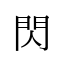

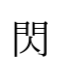

In [806]:
def random_translation(img: Image):
    a = convert_from_image_to_cv2(img)
    b = tf.keras.preprocessing.image.random_shift(
        a,
        wrg=0.1,
        hrg=0.1,
        row_axis=0,
        col_axis=1,
        channel_axis=2,
        fill_mode="nearest",
        cval=0.0,
        interpolation_order=1,
    )
    return convert_from_cv2_to_image(b)


image = create_image((64, 64), "white", kanji, fonts[0], "black")
image = create_image((64, 64), "white", kanji, fonts[1], "black")
display(image)
display(random_translation(image))

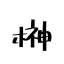

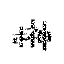

In [579]:
def random_erasing(img: Image):
    a = convert_from_image_to_cv2(img)
    width, length, channels = a.shape
    for i in range(width):
        for j in range(length):
            if a[i, j, 0] != 255 and random.random() < 0.3:
                a[i, j, 0] = 255
                a[i, j, 1] = 255
                a[i, j, 2] = 255

    return convert_from_cv2_to_image(a)

image = create_image((64, 64), "white", kanji, fonts[0], "black")
display(image)
display(random_erasing(image))

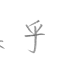

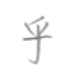

In [961]:
def zoom_center(img):
    zoom_factor = 1 + random.random()
    a = convert_from_image_to_cv2(img)

    y_size = a.shape[0]
    x_size = a.shape[1]
    
    # define new boundaries
    x1 = int(0.5*x_size*(1-1/zoom_factor))
    x2 = int(x_size-0.5*x_size*(1-1/zoom_factor))
    y1 = int(0.5*y_size*(1-1/zoom_factor))
    y2 = int(y_size-0.5*y_size*(1-1/zoom_factor))

    # first crop image then scale
    img_cropped = a[y1:y2,x1:x2]
    b = cv2.resize(img_cropped, None, fx=zoom_factor, fy=zoom_factor)
    return convert_from_cv2_to_image(b)

def threshhold(img: Image):
    img = convert_from_image_to_cv2(img)
    lower = np.array([200, 200, 200])
    upper = np.array([255, 255, 255])

    # Create mask to only select black
    thresh = cv2.inRange(img, lower, upper)

    # apply morphology
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20,20))
    morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

    # invert morp image
    mask = 255 - morph

    # apply mask to image
    result = cv2.bitwise_and(img, img, mask=mask)
    return convert_from_image_to_cv2(result)

path = "/home/hasnain/ドキュメント/cs/yr3/310/unicode-pictures-dataset/modified-dataset/0x4e4e/1051114.png"
image = convert_from_cv2_to_image(cv2.imread(path))
display(image)
display(threshhold(image))


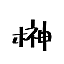

sharpen


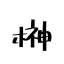

dilate


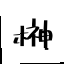

shear


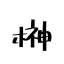

normal


In [65]:
# image2 = shear(image)
# display(image)
# display(image2)

# image = PImage.new('RGB', (64, 64), (255, 255, 255))
# draw = ImageDraw.Draw(image)
# draw.text(( 3, 3 ), kanji, font=handwriting_font, fill=(0, 0, 0))    
image_labels = ["sharpen" , "dilate", "shear", "normal"]
images = []

for i in range(4):
    font = fonts[0]
    image = create_image((64 ,64), 'white', kanji, font, 'black')

    match i % 4:
        case 0:
            image = sharpen(image)
        case 1:
            image = dilate(image)
        case 2:
            image = shear(image)
        case 3:
            image = image
    images.append(image)



        
for i, image in enumerate(images):
    display(image)
    print(image_labels[i])

# For each image we want to generate 25 drawings for each font,
# all 25 are sheared and then we erode dilate blur sharpen smooth each image 5 times each





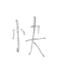

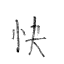

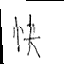

In [798]:
original = cv2.imread('unicode-pictures-dataset/modified-dataset/0x5feb/551382.png')
display(convert_from_cv2_to_image(original))


res = ((original - original.min()) * 255.0 / (original.max() - original.min())).astype(np.uint8)
denoised_img = convert_from_cv2_to_image(res)
# im = ImageChops.darker(im1, im2) 
display(denoised_img)

display(shear(sharpen(random_translation(random_zoom(denoised_img)))))

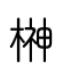

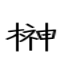

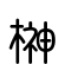

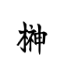

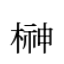

In [819]:
fontsize = 5
a = ImageFont.truetype(font="./fonts/ZenMaruGothic-Regular.ttf", size = fontsize)
b = ImageFont.truetype(font="./fonts/ZenKurenaido-Regular.ttf", size = fontsize)
c = ImageFont.truetype(font="./fonts/HachiMaruPop-Regular.ttf", size = fontsize)
d = ImageFont.truetype(font="./fonts/YujiBoku-Regular.ttf", size = fontsize)
e = ImageFont.truetype(font="./fonts/NotoSerifJP-VariableFont_wght.ttf", size = fontsize)


kanji = "鬱"

# W, H = 64, 64
# image = PImage.new('RGB', (W, H), (255, 255, 255))
# draw = ImageDraw.Draw(image)
# _, _, w, h = draw.textbbox((0, 0), kanji, font=mincho)
# draw.text(((W-w)/2, (H-h)/2), kanji, font=mincho, fill=(0,0,0))

img_fraction = 0.61

image = create_image((64 ,64), 'white', kanji, a, 'black')
while a.getbbox(kanji)[2] < img_fraction * image.size[0]:
    fontsize += 1
    a = ImageFont.truetype(font="./fonts/ZenMaruGothic-Regular.ttf", size = fontsize)



fontsize = 5
image = create_image((64 ,64), 'white', kanji, b, 'black')
while b.getbbox(kanji)[2] < img_fraction * image.size[0]:
    fontsize += 1
    b = ImageFont.truetype(font="./fonts/ZenKurenaido-Regular.ttf", size = fontsize)



image = create_image((64 ,64), 'white', kanji, c, 'black')
while c.getbbox(kanji)[2] < img_fraction * image.size[0]:
    fontsize += 1
    c = ImageFont.truetype(font="./fonts/HachiMaruPop-Regular.ttf", size = fontsize)



fontsize = 5
image = create_image((64 ,64), 'white', kanji, d, 'black')
while d.getbbox(kanji)[2] < img_fraction * image.size[0]:
    fontsize += 1
    d = ImageFont.truetype(font="./fonts/YujiBoku-Regular.ttf", size = fontsize)



fontsize = 5
image = create_image((64 ,64), 'white', kanji, e, 'black')
while e.getbbox(kanji)[2] < img_fraction * image.size[0]:
    fontsize += 1
    e = ImageFont.truetype(font="./fonts/NotoSerifJP-VariableFont_wght.ttf", size = fontsize)


fonts = [a,b,c,d,e]


kanji = "榊"
image0 = create_image((64, 64), "white", kanji, fonts[0], "black")
display(random_zoom(image0))
image1 = create_image((64, 64), "white", kanji, fonts[1], "black")
display(random_zoom(image1))
image2 = create_image((64, 64), "white", kanji, fonts[2], "black")
display(random_zoom(image2))
image3 = create_image((64, 64), "white", kanji, fonts[3], "black")
display(random_zoom(image3))
image4 = create_image((64, 64), "white", kanji, fonts[4], "black")
display(random_zoom(image4))

In [926]:
1 + random.random()

1.2739947795821875

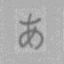

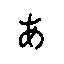

In [52]:
import numpy as np
from PIL import Image
import cv2

def convert_from_cv2_to_image(img: np.ndarray) -> Image:
    # return Image.fromarray(img)
    return Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


def convert_from_image_to_cv2(img: Image) -> np.ndarray:
    # return np.asarray(img)
    return cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

def threshhold(img: Image):
    img = convert_from_image_to_cv2(img)

    _, image_black = cv2.threshold(img, 154, 255, cv2.THRESH_BINARY)

    return convert_from_cv2_to_image(image_black)

    
path = "unicode-pictures-dataset/modified-dataset/0x3042/209137.png"
image = convert_from_cv2_to_image(cv2.imread(path))
display(image)
display(threshhold(image))

[1.63, 41.94, 81.38, 89.42999999999999, 92.24, 93.89999999999999, 94.92, 95.71, 96.23, 96.85000000000001, 97.31, 97.55, 97.85000000000001, 97.81, 98.15, 98.22999999999999, 98.35000000000001, 98.49, 98.29, 98.68, 98.79, 98.86, 98.81, 98.86, 99.03, 99.0, 99.06, 99.05000000000001, 99.13, 99.19, 99.24, 99.2, 99.29, 99.28, 99.32, 99.33999999999999, 99.33999999999999, 99.4, 99.37, 99.41, 99.4, 99.46000000000001, 99.42, 99.44, 99.48, 99.56, 99.52, 99.48, 99.62, 99.57000000000001, 99.53999999999999, 99.53999999999999, 99.6, 99.66000000000001, 99.63, 99.57000000000001, 99.66000000000001, 99.57000000000001, 99.65, 99.67, 99.66000000000001, 99.61, 99.67, 99.7, 99.68, 99.69, 99.72, 99.66000000000001, 99.71, 99.67, 99.72999999999999, 99.7, 99.74, 99.72999999999999, 99.71, 99.72999999999999, 99.75, 99.71, 99.75, 99.77000000000001, 99.75, 99.75, 99.77000000000001, 99.76, 99.75, 99.77000000000001, 99.75, 99.77000000000001, 99.79, 99.81, 99.8, 99.8, 99.79, 99.81, 99.77000000000001, 99.72, 99.81, 99.839

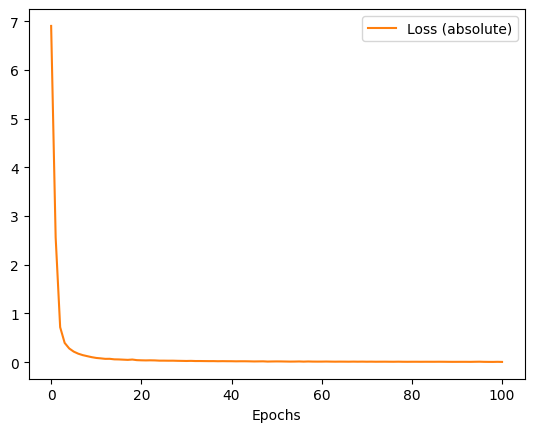

In [8]:
import matplotlib.pyplot as plt
import numpy as np

accuracy = None
loss = None

with open('epochdata.txt', 'r') as file:
    combined = [(x.split(' ')[7], x.split(' ')[10]) for x in file.read().split('\n') if not 'Epoch' in x]
    accuracy = [float(x[0]) * 100 for x in combined]
    loss = [float(x[1]) for x in combined] 
    print(accuracy)
    print(loss)

epochs = [i for i in range(len(accuracy))]
    
plt.plot([], [])
# plt.plot([], [], label = "Accuracy (percentage)")
plt.plot(epochs, loss, label = "Loss (absolute)")
plt.xlabel("Epochs")
plt.legend()
plt.show() 